In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [50]:
train = pd.read_csv(r'C:\Users\user\Downloads\club mahindra\train.csv')
test = pd.read_csv(r'C:\Users\user\Downloads\club mahindra\test.csv')

In [51]:
# train['amount_spent_per_room_night_scaled'] = (train['amount_spent_per_room_night_scaled'] - 7.720801) / 1.090109

In [52]:
#removing outliers
train.drop(80315,axis=0,inplace=True)

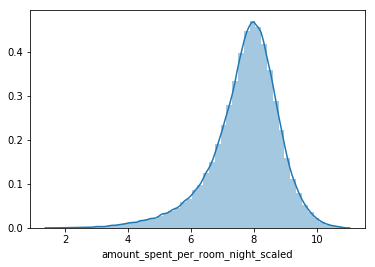

In [53]:
# from scipy import stats
# from scipy.stats import norm, skew #for some statistics
# #We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
# train["amount_spent_per_room_night_scaled"] = np.sqrt(train["amount_spent_per_room_night_scaled"])

# #Check the new distribution 
# sns.distplot(train['amount_spent_per_room_night_scaled'] , fit=norm);

# # Get the fitted parameters used by the function
# (mu, sigma) = norm.fit(train['amount_spent_per_room_night_scaled'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('amount_spent_per_room_night_scaled ')

# #Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(train['amount_spent_per_room_night_scaled'], plot=plt)
# plt.show()
sns.distplot(train['amount_spent_per_room_night_scaled'])

In [54]:
train.shape,test.shape

((341423, 24), (146765, 23))

In [55]:
train['source'] = 'train'
test['source'] = 'test'

data= pd.concat([train,test],ignore_index=False)

In [56]:
#creating datetime datatypes
data['booking_date'] = pd.to_datetime(data['booking_date'], format='%d/%m/%y')
data['checkin_date'] = pd.to_datetime(data['checkin_date'], format='%d/%m/%y')
data['checkout_date'] = pd.to_datetime(data['checkout_date'], format='%d/%m/%y')

In [57]:
#calculating days
data['total_journey'] = data['checkout_date'] - data['checkin_date']
data['advanced_booking_days'] = data['checkin_date'] - data['booking_date']
data['total_journey'] = data['total_journey'].astype('timedelta64[D]')
data['advanced_booking_days'] = data['advanced_booking_days'].astype('timedelta64[D]')

In [58]:
#isweekend or not
# data['weekend']=((pd.DatetimeIndex(data.checkin_date).dayofweek) // 5 == 1).astype(float)

In [59]:
#extracting month and quarter
# data['booking_quarter']=data.booking_date.dt.quarter
data['booking_month']=data.booking_date.dt.month
data['booking_year']=data.booking_date.dt.year

In [60]:
#dropping dates
data.drop(['checkin_date','checkout_date','booking_date'],axis=1,inplace=True)

In [61]:
#dropping ids
data.drop(['memberid','reservation_id'],axis=1,inplace=True)

# data.drop(['resort_id'],axis=1,inplace=True)

In [62]:
#concatenating similar columns
# data['reservationstatusid_code_booking_type'] = data['booking_type_code'].astype(str) + data['reservationstatusid_code']

data['cluster_code_resort_type'] = data['resort_type_code'].astype(str) + data['cluster_code'] + data['resort_region_code'].astype(str) + data['state_code_resort'].astype(str)

#dropping used columns
data.drop(['resort_type_code','cluster_code','resort_region_code','state_code_resort'],axis=1,inplace=True)

In [63]:
#deleting unwanted features
# data.drop('state_code_residence',axis=1,inplace=True)

In [64]:
#data['season_holidayed_code'] = data.groupby('memberid')['season_holidayed_code'].transform(lambda x : x.fillna(mode(x)))
data['season_holidayed_code'] = data['season_holidayed_code'].fillna(2)

In [65]:
data['state_code_residence'] = data['state_code_residence'].fillna(1)

In [66]:
#dropping
# data.drop('state_code_resort',axis=1,inplace=True)

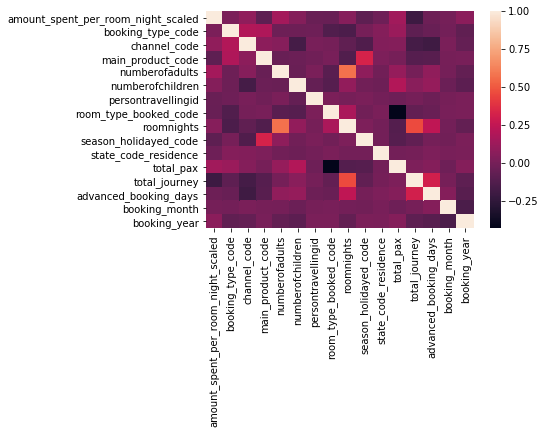

In [67]:
sns.heatmap(data.corr())

In [68]:
data.dtypes

amount_spent_per_room_night_scaled    float64
booking_type_code                       int64
channel_code                            int64
main_product_code                       int64
member_age_buckets                     object
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
reservationstatusid_code               object
resort_id                              object
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
source                                 object
state_code_residence                  float64
total_pax                               int64
total_journey                         float64
advanced_booking_days                 float64
booking_month                           int64
booking_year                            int64
cluster_code_resort_type               object
dtype: object

In [69]:
data.head()

,amount_spent_per_room_night_scaled,booking_type_code,channel_code,main_product_code,member_age_buckets,numberofadults,numberofchildren,persontravellingid,reservationstatusid_code,resort_id,...,roomnights,season_holidayed_code,source,state_code_residence,total_pax,total_journey,advanced_booking_days,booking_month,booking_year,cluster_code_resort_type
0,7.706428,1,3,1,F,2,0,46,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,...,1,2.0,train,7.0,3,1.0,0.0,4,2018,3F33
1,6.662563,1,1,1,F,2,0,46,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,...,5,2.0,train,7.0,2,5.0,78.0,1,2015,3F35
2,7.871602,1,1,1,F,2,0,47,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,...,4,2.0,train,7.0,2,4.0,4.0,1,2015,5E11
3,5.344943,1,1,1,F,2,2,46,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,...,5,2.0,train,7.0,2,5.0,40.0,5,2015,2D22
4,7.059346,1,1,1,F,2,0,46,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,...,5,2.0,train,7.0,2,5.0,103.0,9,2015,2D22


In [70]:
data.dtypes

amount_spent_per_room_night_scaled    float64
booking_type_code                       int64
channel_code                            int64
main_product_code                       int64
member_age_buckets                     object
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
reservationstatusid_code               object
resort_id                              object
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
source                                 object
state_code_residence                  float64
total_pax                               int64
total_journey                         float64
advanced_booking_days                 float64
booking_month                           int64
booking_year                            int64
cluster_code_resort_type               object
dtype: object

In [72]:
#creating dummies values
list1=['resort_id','cluster_code_resort_type']
for col in list1:
    dummies=pd.get_dummies(data[col],drop_first=True,prefix=col)
    data = pd.concat([data,dummies],axis=1)
    del data[col]
del dummies

In [73]:
train.dtypes

reservation_id                         object
booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                               object
cluster_code                           object
reservationstatusid_code          

In [270]:
train= data.loc[data['source']=='train']
test= data.loc[data['source']=='test']

train.drop('source',axis=1,inplace=True)
test.drop('source',axis=1,inplace=True)

In [271]:
y = train['amount_spent_per_room_night_scaled']
train.drop('amount_spent_per_room_night_scaled',axis=1,inplace=True)
test.drop('amount_spent_per_room_night_scaled',axis=1,inplace=True)

In [272]:
train = train[columns]
test = test[columns]

In [273]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,y,test_size = 0.2)

In [27]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [237]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [253]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [254]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [255]:
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [256]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [257]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1,n_jobs=-1)



In [258]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,n_jobs=-1)

In [259]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 1.0200 (0.0039)



In [260]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 1.0199 (0.0039)



In [261]:
# score = rmsle_cv(KRR)
# print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [262]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.9916 (0.0039)



In [263]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.9879 (0.0036)



In [264]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.9920 (0.0037)



In [265]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [266]:
averaged_models = AveragingModels(models = (ENet, GBoost, model_xgb, lasso,model_lgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.9935 (0.0038)



In [270]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [274]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, model_xgb),
                                                 meta_model = lasso)

# score = rmsle_cv(stacked_averaged_models)
# print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [275]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [278]:
stacked_averaged_models.fit(x_train, y_train)
# stacked_train_pred = stacked_averaged_models.predict(train.values)
# stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
# print(rmsle(y_test, stacked_train_pred))

KeyError: "None of [Int64Index([     0,      1,      2,      3,      4,      5,      6,      8,\n                 9,     10,\n            ...\n            273122, 273125, 273126, 273127, 273128, 273130, 273133, 273135,\n            273137, 273138],\n           dtype='int64', length=218511)] are in the [columns]"

# linear models

In [222]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [223]:
lambdas=np.linspace(110,130,100)
params={'alpha':lambdas}

In [42]:
# model=Lasso(fit_intercept=True)
model=Ridge(fit_intercept=True)

In [44]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': array([110.     , 110.20202, ..., 129.79798, 130.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [45]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -1.018 (std: 0.006)
Parameters: {'alpha': 110.0}

Model with rank: 2
Mean validation score: -1.018 (std: 0.006)
Parameters: {'alpha': 110.20202020202021}

Model with rank: 3
Mean validation score: -1.018 (std: 0.006)
Parameters: {'alpha': 110.4040404040404}

Model with rank: 4
Mean validation score: -1.018 (std: 0.006)
Parameters: {'alpha': 110.60606060606061}

Model with rank: 5
Mean validation score: -1.018 (std: 0.006)
Parameters: {'alpha': 110.8080808080808}



In [46]:
grid_search.best_estimator_

Ridge(alpha=110.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
lasso_model=grid_search.best_estimator_

In [48]:
lasso_model.fit(x_train,y_train)

Ridge(alpha=110.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
list(zip(x_train.columns,lasso_model.coef_))

[('channel_code', 0.044722096765344374),
 ('main_product_code', -0.09554070901417613),
 ('numberofadults', 0.011444677352351032),
 ('numberofchildren', 0.03387294075043128),
 ('persontravellingid', -4.6937011877857606e-05),
 ('resort_region_code', -0.07003163638784406),
 ('room_type_booked_code', -0.017238593400550607),
 ('roomnights', 0.08278882961038811),
 ('season_holidayed_code', -0.07248425286154433),
 ('state_code_residence', -0.003605844283103192),
 ('state_code_resort', 0.006997449488584188),
 ('total_pax', 0.12393573333711634),
 ('total_journey', -0.2878851535101176),
 ('advanced_booking_days', 0.00021856143681890734),
 ('weekend', 0.02681103209132229),
 ('booking_quarter', -0.0296103798444465),
 ('booking_month', 0.012447193063016958),
 ('booking_year', 0.06046629471890163),
 ('reservationstatusid_code_booking_type_1B', 0.02656166775965625),
 ('reservationstatusid_code_booking_type_1C', 0.003372637124097696),
 ('reservationstatusid_code_booking_type_2A', 0.060658437073866076)

In [50]:
predicted=grid_search.predict(x_test)

In [51]:
residual= predicted-y_test 

rmse= np.sqrt(np.dot(residual,residual)/len(predicted))
rmse

1.0011032625274083

In [52]:
rmse

1.0011032625274083

In [753]:
predicted=grid_search.predict(test)

sample_sub=pd.read_csv('sample_submission.csv')

# sub_df_gr = pd.DataFrame({"reservation_id":sample_sub["reservation_id"].values})
sub_df_gr["amount_spent_per_room_night_scaled"] = predicted
sub_df_gr.to_csv("lgb_pred_encoded.csv", index=False)

# lightgbm

In [274]:
from lightgbm import LGBMRegressor

In [275]:
# lgb = LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,n_jobs=-1)
lgb = LGBMRegressor()

In [276]:
lgb.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [277]:
predicted = lgb.predict(x_test)

In [278]:
residual=predicted - y_test

rmse_lm=np.sqrt(np.dot(residual,residual)/len(y_test))

rmse_lm

0.9018237877272697

In [279]:
r2_score(y_test,predicted)

0.19295420309795486

In [280]:
rmse_lm

0.9018237877272697

In [286]:
predicted.std()

0.42221189520802394

In [284]:
predicted=lgb.predict(test)
sample_sub=pd.read_csv('sample_submission.csv')

sub_df_gr = pd.DataFrame({"reservation_id":sample_sub["reservation_id"].values})
sub_df_gr["amount_spent_per_room_night_scaled"] = predicted
sub_df_gr.to_csv("lgb_pred_encoded.csv", index=False)

In [198]:
a = sorted(list(zip(x_train.columns,lgb.feature_importances_)), key=lambda x: x[1],reverse=True)

In [216]:
columns=[]
for i in range(60):
    col = a[i][0]
    columns.append(col)

In [282]:
sorted(list(zip(x_train.columns,lgb.feature_importances_)), key=lambda x: x[1],reverse=True)

[('roomnights', 272),
 ('numberofadults', 246),
 ('total_journey', 223),
 ('advanced_booking_days', 193),
 ('total_pax', 179),
 ('state_code_residence', 168),
 ('persontravellingid', 118),
 ('booking_year', 111),
 ('main_product_code', 107),
 ('booking_month', 80),
 ('season_holidayed_code', 77),
 ('resort_id_7902699be42c8a8e46fbbb4501726517e86b22c56a189f7625a6da49081b2451',
  65),
 ('cluster_code_resort_type_1F16', 64),
 ('resort_id_ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d',
  59),
 ('cluster_code_resort_type_1F14', 56),
 ('numberofchildren', 55),
 ('resort_id_9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767',
  46),
 ('room_type_booked_code', 43),
 ('cluster_code_resort_type_2F111', 42),
 ('cluster_code_resort_type_4B210', 42),
 ('resort_id_da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c',
  42),
 ('cluster_code_resort_type_4B213', 36),
 ('reservationstatusid_code_booking_type_2A', 35),
 ('resort_id_c6f3ac57944a531490cd39902d0f

In [34]:
from sklearn.metrics import r2_score